In [1]:
"""# **Import libraries**"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
"""# **Upload and Read file**"""

from google.colab import files
files.upload()

df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

df.head(8)

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1 (1).csv


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68


In [3]:
"""# **Cleaning the data**"""

df.columns

df.drop('Serial No.',axis=1,inplace=True)

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<ipython-input-4-bfd32ba550ed>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.CGPA)


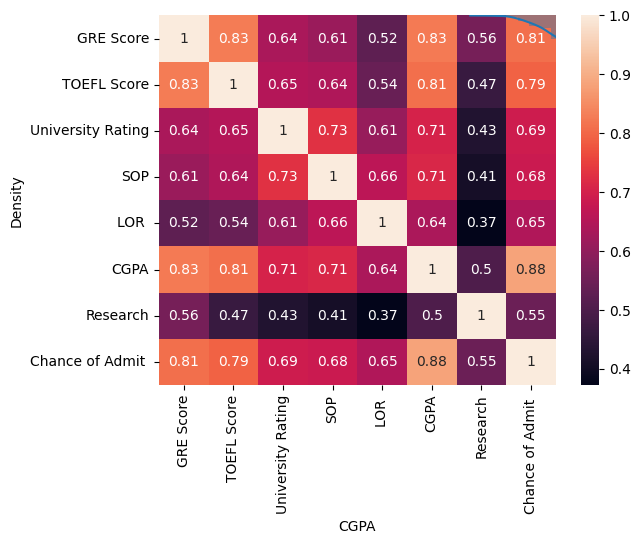

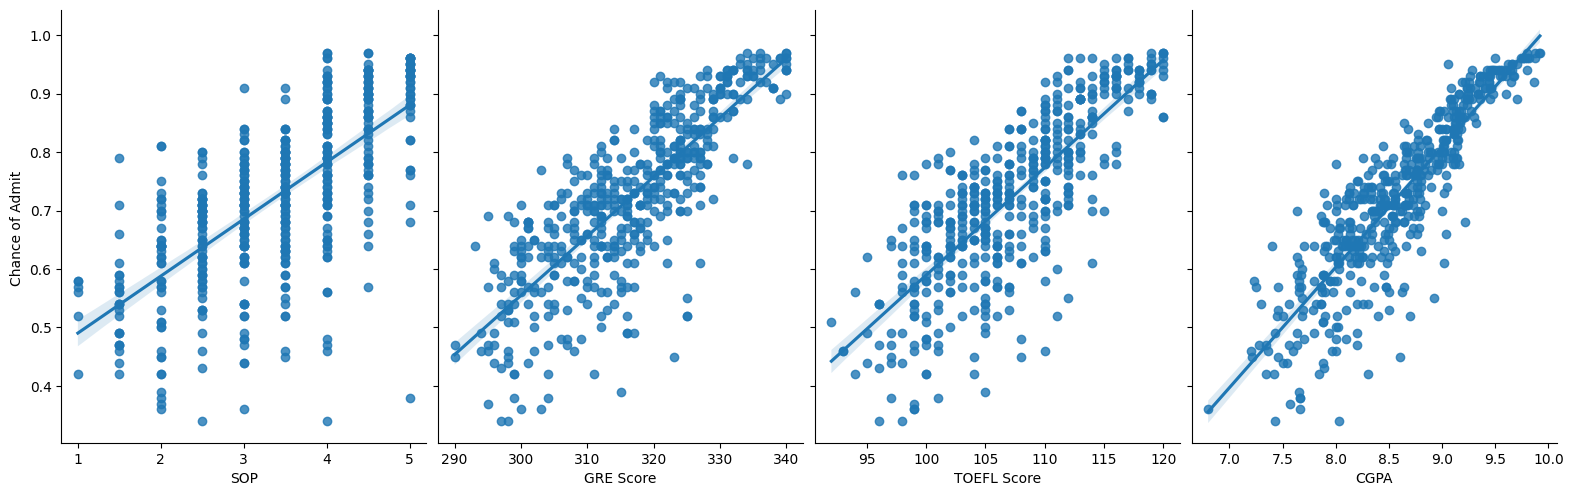

In [4]:
"""#**Exploratory Data Aanalysis**"""

df.describe()

df.corr()

sns.heatmap(df.corr(), annot=True)

sns.distplot(df.CGPA)

sns.pairplot(df,x_vars=['SOP','GRE Score','TOEFL Score','CGPA'],y_vars=['Chance of Admit '],height=5, aspect=0.8, kind='reg')

In [5]:
"""# **Creating Model**"""

df.columns

x=df[['GRE Score', 'TOEFL Score', 'CGPA']]

y=df[['Chance of Admit ']]

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=0)

x_train.shape

y_train.shape

linreg = LinearRegression()
linreg.fit(x_train,y_train)


LinearRegression()

In [6]:
"""# **Testing and Evaluating the Model**"""

y_pred=linreg.predict(x_test)

y_pred[:7]

y_test.head(7)

from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))

0.04688621359385713
